# CLASSIFICATION(**SINIFLANDIRMA**)

In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [160]:
import lightgbm as lgb
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.model_selection import GridSearchCV

In [2]:
from google.colab import files

# Kaggle API anahtarlarınızın bulunduğu JSON dosyasını seçin
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hamzabayram019","key":"18d8eec5a92d728a626ca56868da11e5"}'}

In [4]:
import shutil

# Yüklenen JSON dosyasını ~/.kaggle/ klasörüne taşı
shutil.move('/content/kaggle.json', '/root/.kaggle/kaggle.json')

'/root/.kaggle/kaggle.json'

In [6]:
import os
import zipfile
import pandas as pd

# Veriyi indir
os.system('kaggle competitions download -c playground-series-s3e22')

# ZIP dosyasını çıkar
with zipfile.ZipFile('/content/playground-series-s3e22.zip', 'r') as zip_ref:
    zip_ref.extractall()

# CSV dosyasını DataFrame'e yükle
csv_filename = 'train.csv'
dataset = pd.read_csv(csv_filename)

# İlk birkaç satırı görüntüle
print(dataset.head())

   id surgery    age  hospital_number  rectal_temp  pulse  respiratory_rate  \
0   0     yes  adult           530001         38.1  132.0              24.0   
1   1     yes  adult           533836         37.5   88.0              12.0   
2   2     yes  adult           529812         38.3  120.0              28.0   
3   3     yes  adult          5262541         37.1   72.0              30.0   
4   4      no  adult          5299629         38.0   52.0              48.0   

  temp_of_extremities peripheral_pulse mucous_membrane  ...  \
0                cool          reduced   dark_cyanotic  ...   
1                cool           normal   pale_cyanotic  ...   
2                cool          reduced       pale_pink  ...   
3                cold          reduced       pale_pink  ...   
4              normal           normal     normal_pink  ...   

  packed_cell_volume total_protein abdomo_appearance abdomo_protein  \
0               57.0           8.5     serosanguious            3.4   
1   

In [224]:
#verilerin yüklenmesi
veriler=pd.read_csv("/content/train.csv")
veriler

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,...,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,...,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,...,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,...,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,...,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,1230,yes,adult,535246,38.5,129.0,48.0,cool,reduced,pale_pink,...,57.0,66.0,serosanguious,2.0,yes,2206,0,0,no,lived
1231,1231,yes,adult,528570,37.5,60.0,50.0,cool,reduced,pale_cyanotic,...,35.0,6.4,serosanguious,3.6,yes,2209,0,0,yes,died
1232,1232,yes,young,529685,37.5,84.0,40.0,normal,reduced,normal_pink,...,40.0,5.9,cloudy,7.0,yes,400,0,0,yes,lived
1233,1233,yes,adult,534784,38.1,70.0,16.0,normal,reduced,bright_red,...,58.0,74.0,cloudy,2.0,yes,2209,0,0,no,lived


In [40]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

def one_hot_encode(data, columns):
    # Kategorik sütunları seçme
    categorical_data = data[columns]

    # One-Hot Encoder oluşturma
    encoder = OneHotEncoder(sparse=False, drop='first')

    # Kategorik veriyi dönüştürme
    encoded_data = encoder.fit_transform(categorical_data)

    # One-Hot Encoding sonucunu DataFrame'e dönüştürme
    encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(columns))

    # Dönüştürülmüş veriyi orijinal veriyle birleştirme
    preprocessed_data = pd.concat([data.drop(columns, axis=1), encoded_df], axis=1)

    return preprocessed_data




def min_max_scale(data, column):
    # Min-Max Scaler oluşturma
    scaler = MinMaxScaler()

    # Sütunu seçme ve ölçeklendirme
    scaled_column = scaler.fit_transform(data[[column]])

    # Ölçeklendirilmiş sütunu yeni bir DataFrame'e dönüştürme
    scaled_data = pd.DataFrame(scaled_column, columns=[column])

    # Ölçeklendirilmiş sütunu orijinal veri setine ekleme
    data[column] = scaled_data[column]

    return data


def fill_nan_with_mean(data):
    for column in data.columns:
        if data[column].isnull().any():
            mean = data[column].mean()
            data[column].fillna(mean, inplace=True)
    return data
def fill_nan_with_most_common(data, column):
    if data[column].isnull().any():
        most_common_value = data[column].mode()[0]
        data[column].fillna(most_common_value, inplace=True)
    return data

def veriOnIsleme(data, columnsForOneHotEncoder, columnsForMinMaxScaler):
    for column in columnsForOneHotEncoder:
        data = fill_nan_with_most_common(data, column)  # Kategorik sütunları en sık geçen değerle doldur
    data = fill_nan_with_mean(data)  # Sayısal sütunları ortalama ile doldur
    dataForOneHot = one_hot_encode(data, columnsForOneHotEncoder)
    for column in columnsForMinMaxScaler:
        dataForOneHot = min_max_scale(dataForOneHot, column)
    return dataForOneHot

In [225]:
veriler=veriler.drop(["id"],axis=1)

In [226]:
veriler

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,more_3_sec,...,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,more_3_sec,...,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,less_3_sec,...,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,more_3_sec,...,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,less_3_sec,...,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,yes,adult,535246,38.5,129.0,48.0,cool,reduced,pale_pink,more_3_sec,...,57.0,66.0,serosanguious,2.0,yes,2206,0,0,no,lived
1231,yes,adult,528570,37.5,60.0,50.0,cool,reduced,pale_cyanotic,less_3_sec,...,35.0,6.4,serosanguious,3.6,yes,2209,0,0,yes,died
1232,yes,young,529685,37.5,84.0,40.0,normal,reduced,normal_pink,less_3_sec,...,40.0,5.9,cloudy,7.0,yes,400,0,0,yes,lived
1233,yes,adult,534784,38.1,70.0,16.0,normal,reduced,bright_red,less_3_sec,...,58.0,74.0,cloudy,2.0,yes,2209,0,0,no,lived


In [227]:
# Stres seviyesini hesaplayın ve yeni bir sütun oluşturun
veriler["stres_seviyesi"] = "Normal"  # Başlangıçta tüm değerleri "Normal" olarak ayarlayın

# pulse sütununu ortalamanın üstünde mi kontrol edin
pulse_condition = veriler["pulse"] > veriler["pulse"].median()

# respiratory_rate sütununu ortalamanın üstünde mi kontrol edin
respiratory_rate_condition = veriler["respiratory_rate"] > veriler["respiratory_rate"].median()

# Koşullara göre stres seviyesini güncelleyin
veriler.loc[pulse_condition & respiratory_rate_condition, "stres_seviyesi"] = "High"

In [145]:
veriler

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_2,lesion_3,cp_data,outcome,stres_seviyesi
0,yes,adult,38.1,132.0,24.0,cool,reduced,dark_cyanotic,more_3_sec,depressed,...,57.0,8.5,serosanguious,3.4,yes,0,0,no,died,Normal
1,yes,adult,37.5,88.0,12.0,cool,normal,pale_cyanotic,more_3_sec,mild_pain,...,33.0,64.0,serosanguious,2.0,yes,0,0,no,euthanized,Normal
2,yes,adult,38.3,120.0,28.0,cool,reduced,pale_pink,less_3_sec,extreme_pain,...,37.0,6.4,serosanguious,3.4,yes,0,0,no,lived,Normal
3,yes,adult,37.1,72.0,30.0,cold,reduced,pale_pink,more_3_sec,mild_pain,...,53.0,7.0,cloudy,3.9,yes,0,0,yes,lived,Normal
4,no,adult,38.0,52.0,48.0,normal,normal,normal_pink,less_3_sec,alert,...,47.0,7.3,cloudy,2.6,no,0,0,yes,lived,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,yes,adult,38.5,129.0,48.0,cool,reduced,pale_pink,more_3_sec,depressed,...,57.0,66.0,serosanguious,2.0,yes,0,0,no,lived,High
1231,yes,adult,37.5,60.0,50.0,cool,reduced,pale_cyanotic,less_3_sec,mild_pain,...,35.0,6.4,serosanguious,3.6,yes,0,0,yes,died,Normal
1232,yes,young,37.5,84.0,40.0,normal,reduced,normal_pink,less_3_sec,mild_pain,...,40.0,5.9,cloudy,7.0,yes,0,0,yes,lived,High
1233,yes,adult,38.1,70.0,16.0,normal,reduced,bright_red,less_3_sec,mild_pain,...,58.0,74.0,cloudy,2.0,yes,0,0,no,lived,Normal


<ipython-input-185-390e59cfc88b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = veriler.corr()


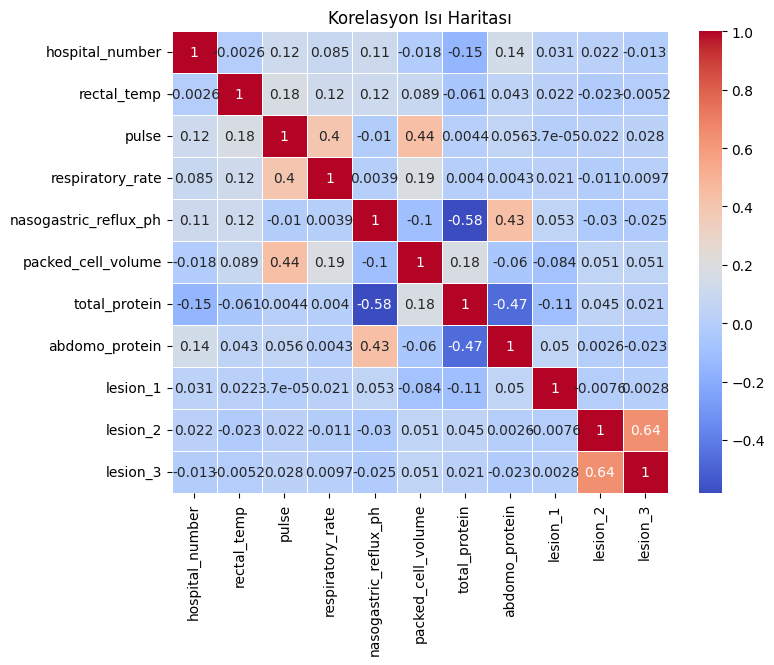

In [185]:
# Korelasyon matrisini hesaplayın
correlation_matrix = veriler.corr()

# Korelasyon matrisini ısı haritası olarak görselleştirin
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title("Korelasyon Isı Haritası")
plt.show()

In [228]:
MyY = veriler["outcome"]

In [229]:
veriler=veriler.drop(["outcome"],axis=1)

In [230]:
# Sütun isimlerini ve veri tiplerini alma
column_names = veriler.columns.tolist()  # Sütun isimleri
column_types = veriler.dtypes.tolist()   # Sütun veri tipleri


categorical_columns = [column_names[i] for i in range(len(column_names)) if 'object' in str(column_types[i])]
numeric_columns = [column_names[i] for i in range(len(column_names)) if 'int' in str(column_types[i]) or 'float' in str(column_types[i])]


In [231]:
veriOnİslemeliSetDuzelt=veriOnIsleme(veriler,categorical_columns, numeric_columns)
MyX = veriOnİslemeliSetDuzelt

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [232]:
MyX=MyX.drop(["nasogastric_reflux_slight","rectal_exam_feces_serosanguious","peristalsis_distend_small","pain_slight"],axis=1)

In [151]:
MyX

,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_2,lesion_3,surgery_yes,...,abdomen_distend_small,abdomen_firm,abdomen_normal,abdomen_other,abdomo_appearance_clear,abdomo_appearance_cloudy,abdomo_appearance_serosanguious,surgical_lesion_yes,cp_data_yes,stres_seviyesi_Normal
0,0.500000,0.662338,0.181818,0.846154,0.653846,0.058480,0.33,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,0.388889,0.376623,0.045455,0.153846,0.192308,0.707602,0.19,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
2,0.537037,0.584416,0.227273,0.384615,0.269231,0.033918,0.33,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3,0.314815,0.272727,0.250000,0.153846,0.576923,0.040936,0.38,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
4,0.481481,0.142857,0.454545,0.923077,0.461538,0.044444,0.25,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,0.574074,0.642857,0.454545,0.153846,0.653846,0.730994,0.19,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1231,0.388889,0.194805,0.477273,0.307692,0.230769,0.033918,0.35,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
1232,0.388889,0.350649,0.363636,0.307692,0.326923,0.028070,0.69,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1233,0.500000,0.259740,0.090909,0.153846,0.673077,0.824561,0.19,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [152]:
MyY

0             died
1       euthanized
2            lived
3            lived
4            lived
           ...    
1230         lived
1231          died
1232         lived
1233         lived
1234         lived
Name: outcome, Length: 1235, dtype: object

In [233]:
# "sütun_adı" sütununda kaç farklı eleman olduğunu bulun
farkli_eleman_sayisi = MyY.nunique()

# Farklı elemanları yazdırın
farkli_elemanlar = MyY.unique()

# Sonucu yazdırın
print("Sütunda", farkli_eleman_sayisi, "farklı eleman bulunmaktadır.")
print("Farklı elemanlar:", farkli_elemanlar)

Sütunda 3 farklı eleman bulunmaktadır.
Farklı elemanlar: ['died' 'euthanized' 'lived']


In [234]:
#BURADA Y DEĞERLERİ YES/NO ŞEKLİNDE OLDUĞU İÇİN 1/0  yada 0-1-2 ŞEKLİNE ÇEVİRDİM
from sklearn.preprocessing import LabelEncoder
# Encode target variable
le = LabelEncoder()
MyY = le.fit_transform(MyY)

In [235]:
MyY

array([0, 1, 2, ..., 2, 2, 2])

In [156]:
def parcalamaIslemi(A,B):
  from sklearn.model_selection import train_test_split
  X_train, X_test, Y_train, Y_test = train_test_split(A, B,test_size=0.2,random_state=42)
  return X_train, X_test, Y_train, Y_test

In [236]:
MyX_train, MyX_test, MyY_train, MyY_test=parcalamaIslemi(MyX, MyY)

**Kaggle Model**

In [ ]:
import pandas as pd
from sklearn import ensemble, gaussian_process, linear_model, naive_bayes, neighbors, svm, tree, discriminant_analysis
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


# Define the list of different machine learning algorithms
MLA = [
    # Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    # Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),

    # GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),

    # Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),

    # Nearest Neighbor
    neighbors.KNeighborsClassifier(),

    # SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),

    # Trees
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),

    # Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    # xgboost: http://xgboost.readthedocs.io/en/latest/model.html
    XGBClassifier()
]

# Create empty lists to store the results
algo_names = []
train_accuracy_scores = []
test_accuracy_scores = []

# Iterate over each algorithm in MLA
for model in MLA:
    # Fit the model on the training data
    model.fit(MyX_train, MyY_train)

    # Make predictions on the training data
    train_y_pred = model.predict(MyX_train)

    # Calculate the accuracy for the training data
    train_accuracy = accuracy_score(MyY_train, train_y_pred)

    # Make predictions on the testing data
    test_y_pred = model.predict(MyX_test)

    # Calculate the accuracy for the testing data
    test_accuracy = accuracy_score(MyY_test, test_y_pred)

    # Store the results in the lists
    algo_names.append(type(model).__name__)
    train_accuracy_scores.append(train_accuracy)
    test_accuracy_scores.append(test_accuracy)


# Create a dataframe from the results
results_df = pd.DataFrame({
    'Algorithm': algo_names,
    'Training Accuracy': train_accuracy_scores,
    'Testing Accuracy': test_accuracy_scores

})

results_df

In [253]:
import xgboost as xgb
model = xgb.XGBClassifier()

# Modeli eğitin
model.fit(MyX_train, MyY_train)

# Test verileri üzerinde tahminler yapın
y_pred = model.predict(MyX_test)

# Model performansını değerlendirin (örneğin, doğruluk)
accuracy = accuracy_score(MyY_test, y_pred)
print("Doğruluk:", accuracy)

Doğruluk: 0.7408906882591093


In [259]:
# XGBoost sınıflandırıcı modelini oluşturun
model = xgb.XGBClassifier()

# GridSearchCV için hiperparametre ızgarasını tanımlayın
param_grid = {
    'max_depth': [3,1],
    'learning_rate': [0.1,0.2],
    'n_estimators': [100, 20]
}

# GridSearchCV nesnesini oluşturun
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)

# Modeli eğitin ve en iyi hiperparametreleri bulun
grid_search.fit(MyX_train, MyY_train)

# En iyi parametreleri ve skoru yazdırın
print("En iyi parametreler:", grid_search.best_params_)
print("En iyi skor:", grid_search.best_score_)

# En iyi modeli kullanarak tahminler yapın
best_model = grid_search.best_estimator_
y_pred = best_model.predict(MyX_test)

# Model performansını değerlendirin (örneğin, doğruluk)
accuracy = accuracy_score(MyY_test, y_pred)
print("Doğruluk:", accuracy)

En iyi parametreler: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
En iyi skor: 0.7024252679075015
Doğruluk: 0.728744939271255


In [119]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

gb_classifier = GradientBoostingClassifier()

# GridSearchCV için parametre ızgarasını tanımlayın
param_grid = {
    'n_estimators': [12,30,200],
    'learning_rate': [0.01, 0.1, 0.001],
    'max_depth': [3,9,12]
}

# GridSearchCV nesnesini oluşturun
grid_search = GridSearchCV(gb_classifier, param_grid, cv=5)

# Modeli eğitin ve en iyi hiperparametreleri bulun
grid_search.fit(MyX_train,MyY_train)

# En iyi parametreleri ve skoru yazdırın
print("En iyi parametreler:", grid_search.best_params_)
print("En iyi skor:", grid_search.best_score_)

En iyi parametreler: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 30}
En iyi skor: 0.6933035943188227


In [161]:
model_lgb = lgb.LGBMClassifier()
model_knn = KNeighborsClassifier()
model_lr = LogisticRegression(solver='lbfgs', max_iter=1000, penalty='l2')
model_dt = DecisionTreeClassifier()
model_rf = RandomForestClassifier()
model_hg = HistGradientBoostingClassifier()

In [162]:
param_lgb = {
    'num_leaves': [10, 20, 30, 40],
    'max_depth': [1, 3, 5, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'subsample': [0.4, 0.6, 0.8, 1.0]
}

param_knn = {
    'n_neighbors': [3, 5, 7],
    'p': [1, 2],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
}

param_lr = {
    'C':[0.01,0.1,0.5,0.9,1,5,10],
    'tol':[1e-4,1e-2,1,1e2]
}

param_dt = {
    'criterion':['gini','entropy'],
    'min_samples_split':[2,5,10,15],
    'max_depth':[None,2],
    'min_samples_leaf':[1,3,10,15],
    'max_features':[None,'sqrt','log2']
}

param_rf = {
    'n_estimators':[10,50,100],
    'criterion':['entropy'],
    'min_samples_split':[2,5],
    'max_depth':[None,2],
    'min_samples_leaf':[1,3,10],
    'max_features':['sqrt']
}

param_hg = {
    'learning_rate': [0.01, 0.1],
    'max_iter': [100, 200],
    'max_depth': [3, 5],
    'min_samples_leaf': [1, 5],
    'l2_regularization': [0, 0.1],
}

In [163]:
n_cpu = os.cpu_count()
n_thread = n_cpu * 2

In [ ]:
GS_LGB1 = GridSearchCV(model_lgb, param_lgb, cv=10, scoring='f1_micro', n_jobs=n_thread)
GS_LGB1.fit(MyX_train, MyY_train)
print('best_param:', GS_LGB1.best_params_)
print('best_score:', GS_LGB1.best_score_)

In [ ]:
GS_KNN = GridSearchCV(model_knn, param_knn, cv=20, scoring='f1_micro', n_jobs=n_thread)
GS_KNN.fit(MyX_train, MyY_train)
print('best_param:', GS_KNN.best_params_)
print('best_score:', GS_KNN.best_score_)

In [ ]:
GSLR1 = GridSearchCV(model_lr, param_lr, cv=20, scoring='f1_micro', n_jobs=n_thread)
GSLR1.fit(MyX_train, MyY_train)
print('best_param:', GSLR1.best_params_)
print('best_score:', GSLR1.best_score_)

In [ ]:
GSDT1 = GridSearchCV(model_dt, param_dt, cv=20, scoring='f1_micro', n_jobs=n_thread)
GSDT1.fit(MyX_train, MyY_train)
print('best_param:', GSDT1.best_params_)
print('best_score:', GSDT1.best_score_)

In [ ]:
GSRF1 = GridSearchCV(model_rf, param_rf, cv=20, scoring='f1_micro', n_jobs=n_thread)
GSRF1.fit(MyX_train, MyY_train)
print('best_param:', GSRF1.best_params_)
print('best_score:', GSRF1.best_score_)

In [ ]:
GS_HG1 = GridSearchCV(model_hg, param_hg, cv=20, scoring='f1_micro', n_jobs=n_thread)
GS_HG1.fit(MyX_train, MyY_train)
print('best_param:', GS_HG1.best_params_)
print('best_score:', GS_HG1.best_score_)

In [ ]:
# En iyi parametreleri kullanarak LightGBM sınıflandırıcı modelini oluşturun
best_params = {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200, 'num_leaves': 30, 'subsample': 0.4}

model_lgb = lgb.LGBMClassifier(**best_params)

# Modeli eğitin
model_lgb.fit(MyX_train,MyY_train)  # X_train ve y_train, eğitim verilerinizdir

# Modeli kullanarak tahminler yapabilirsiniz
y_pred = model_lgb.predict(MyX_test)  # X_test, test verilerinizdir

In [238]:
# LOGISTIC REGRESSİON METRİCS

f1, precision, sensitivity, specificity = calculate_metrics(MyY_test, y_pred)
print("F1 Score:", f1)
print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
#------------------------------------------------------------
accuracyLG=calculate_accuracy(MyY_test, y_pred)
print("Accuracy",accuracyLG)
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
# Calculate metrics
mse = mean_squared_error(MyY_test, y_pred)
r2 = r2_score(MyY_test, y_pred)
# Print the metrics
print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R^2):", r2)
#   MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(MyY_test, y_pred)
print("Ortalama Mutlak Hata (MAE):", mae)
# RMSE
rmse = np.sqrt(mse)
print("Kök Ortalama Kare Hata (RMSE):", rmse)

F1 Score: 0.7260259961645004
Precision: 0.7305051927477557
Sensitivity (Recall): 0.7246963562753036
Specificity: {0: 0.8285714285714286, 1: 0.9533678756476683, 2: 0.7698412698412699}
Accuracy 0.7246963562753036
Mean Squared Error (MSE): 0.7854251012145749
Coefficient of Determination (R^2): -0.0584934835431854
Ortalama Mutlak Hata (MAE): 0.44534412955465585
Kök Ortalama Kare Hata (RMSE): 0.8862421233582699


In [239]:
test_datası=pd.read_csv("/content/test.csv")

In [241]:
test_datası=test_datası.drop("id",axis=1)

In [242]:
# Test verilerinin sütun isimleri
test_sutunlar = set(test_verisi.columns)

# MyX veri çerçevesinin sütun isimleri
myx_sutunlar = set(MyX.columns)

# Test verilerine ait farklı sütunları bulun
farkli_sutunlar_test = test_sutunlar - myx_sutunlar

# MyX veri çerçevesine ait farklı sütunları bulun
farkli_sutunlar_myx = myx_sutunlar - test_sutunlar

# Farklı sütunları ve ait oldukları veri çerçevesini yazdırın
for sutun in farkli_sutunlar_test:
    print("Farklı Sütun (Test Verileri):", sutun)

for sutun in farkli_sutunlar_myx:
    print("Farklı Sütun (MyX Veri Çerçevesi):", sutun)


Farklı Sütun (Test Verileri): pain_moderate


In [243]:
# Stres seviyesini hesaplayın ve yeni bir sütun oluşturun
test_datası["stres_seviyesi"] = "Normal"  # Başlangıçta tüm değerleri "Normal" olarak ayarlayın

# pulse sütununu ortalamanın üstünde mi kontrol edin
pulse_condition = test_datası["pulse"] > test_datası["pulse"].median()

# respiratory_rate sütununu ortalamanın üstünde mi kontrol edin
respiratory_rate_condition = test_datası["respiratory_rate"] > test_datası["respiratory_rate"].median()

# Koşullara göre stres seviyesini güncelleyin
test_datası.loc[pulse_condition & respiratory_rate_condition, "stres_seviyesi"] = "High"

In [244]:
# Sütun isimlerini ve veri tiplerini alma
column_names = test_datası.columns.tolist()  # Sütun isimleri
column_types = test_datası.dtypes.tolist()   # Sütun veri tipleri


categorical_columns = [column_names[i] for i in range(len(column_names)) if 'object' in str(column_types[i])]
numeric_columns = [column_names[i] for i in range(len(column_names)) if 'int' in str(column_types[i]) or 'float' in str(column_types[i])]

veriOnİslemeliSetDuzelt=veriOnIsleme(test_datası,categorical_columns, numeric_columns)
test_verisi = veriOnİslemeliSetDuzelt

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [245]:
test_verisi=test_verisi.drop("pain_moderate",axis=1)

In [246]:
test_verisi

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,...,abdomen_distend_small,abdomen_firm,abdomen_normal,abdomen_other,abdomo_appearance_clear,abdomo_appearance_cloudy,abdomo_appearance_serosanguious,surgical_lesion_yes,cp_data_yes,stres_seviyesi_Normal
0,0.002645,0.541667,0.027027,0.126437,0.923077,0.365385,0.042303,0.22,0.000000,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.001478,0.458333,0.513514,0.448276,0.384615,0.403846,0.024677,0.25,0.070974,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.001417,0.354167,0.202703,0.034483,0.307692,0.163462,0.024677,0.15,0.070878,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
3,0.002798,0.229167,0.351351,0.126437,0.153846,1.000000,0.905993,0.09,0.045002,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.001765,0.479167,0.094595,0.034483,0.307692,0.269231,0.034078,0.25,0.070974,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,0.001685,0.895833,0.527027,0.310345,0.923077,0.653846,0.049354,0.44,0.103022,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
820,0.002914,0.250000,0.432432,0.126437,0.153846,0.519231,0.729730,0.19,0.071006,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
821,0.001723,0.666667,0.648649,0.034483,0.846154,0.576923,0.043478,0.44,0.070878,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
822,0.996248,0.479167,0.121622,0.655172,0.923077,0.500000,0.055229,0.49,0.100000,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0


In [247]:
MyX

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,...,abdomen_distend_small,abdomen_firm,abdomen_normal,abdomen_other,abdomo_appearance_clear,abdomo_appearance_cloudy,abdomo_appearance_serosanguious,surgical_lesion_yes,cp_data_yes,stres_seviyesi_Normal
0,0.001798,0.500000,0.662338,0.181818,0.846154,0.653846,0.058480,0.33,0.053734,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,0.002600,0.388889,0.376623,0.045455,0.153846,0.192308,0.707602,0.19,0.053710,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
2,0.001759,0.537037,0.584416,0.227273,0.384615,0.269231,0.033918,0.33,0.124641,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3,0.991097,0.314815,0.272727,0.250000,0.153846,0.576923,0.040936,0.38,0.053710,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
4,0.998850,0.481481,0.142857,0.454545,0.923077,0.461538,0.044444,0.25,0.000000,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,0.002895,0.574074,0.642857,0.454545,0.153846,0.653846,0.730994,0.19,0.053661,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1231,0.001499,0.388889,0.194805,0.477273,0.307692,0.230769,0.033918,0.35,0.053734,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
1232,0.001732,0.388889,0.350649,0.363636,0.307692,0.326923,0.028070,0.69,0.009730,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1233,0.002798,0.500000,0.259740,0.090909,0.153846,0.673077,0.824561,0.19,0.053734,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [260]:
import pandas as pd

# Tahminleri oluşturun
pred = best_model.predict(test_verisi)
pred = pd.Series(pred).replace({0: 'died', 1: 'euthanized', 2: 'lived'}).tolist()

# id ve outcome sütunları için bir DataFrame oluşturun
id_range = list(range(1235, 2059))
outcome_df = pd.DataFrame({'id': id_range, 'outcome': pred})

# Sonucu yazdırın
print(outcome_df)

       id     outcome
0    1235       lived
1    1236        died
2    1237       lived
3    1238  euthanized
4    1239       lived
..    ...         ...
819  2054        died
820  2055  euthanized
821  2056        died
822  2057       lived
823  2058       lived

[824 rows x 2 columns]


In [261]:
outcome_df.to_csv('Third-Horse-submission.csv', index=False)

Logistic **Regression**

In [97]:
#BURADA Y DEĞERLERİ YES/NO ŞEKLİNDE OLDUĞU İÇİN 1/0 ŞEKLİNE ÇEVİRDİM
from sklearn.preprocessing import LabelEncoder
# Encode target variable
le = LabelEncoder()
MyY_train_encoded = le.fit_transform(MyY_train)
MyY_test_encoded = le.transform(MyY_test)
MyY_train=MyY_train_encoded
MyY_test=MyY_test_encoded

In [98]:
#Lojistik Regresyon
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
logr=LogisticRegression(random_state=(42))
logr.fit(MyX_train, MyY_train)
y_predLogistic=logr.predict(MyX_test)
cm=confusion_matrix(MyY_test,y_predLogistic)
print("Logistic R. confısuon matrix")
print(cm)

Logistic R. confısuon matrix
[[54  1 17]
 [11 29 14]
 [25  8 88]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [104]:
from sklearn.metrics import precision_score, recall_score, f1_score

def calculate_metrics(y_true, y_pred):
    # Calculate F1 score
    f1 = f1_score(y_true, y_pred, average='weighted')

    # Calculate precision
    precision = precision_score(y_true, y_pred, average='weighted')

    # Calculate sensitivity (recall)
    sensitivity = recall_score(y_true, y_pred, average='weighted')

    # Calculate specificity
    unique_labels = set(y_true)
    specificity = {}
    for label in unique_labels:
        true_negatives = sum((y_true != label) & (y_pred != label))
        false_positives = sum((y_true != label) & (y_pred == label))
        specificity[label] = true_negatives / (true_negatives + false_positives)

    return f1, precision, sensitivity, specificity

In [105]:
def calculate_accuracy(y_true, y_pred):
    correct_predictions = 0
    total_predictions = len(y_true)

    for true_label, pred_label in zip(y_true, y_pred):
        if true_label == pred_label:
            correct_predictions += 1

    accuracy = correct_predictions / total_predictions
    return accuracy

In [107]:
# LOGISTIC REGRESSİON METRİCS

f1, precision, sensitivity, specificity = calculate_metrics(MyY_test, y_predLogistic)
print("F1 Score:", f1)
print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
#------------------------------------------------------------
accuracyLG=calculate_accuracy(MyY_test, y_predLogistic)
print("Accuracy",accuracyLG)
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
# Calculate metrics
mse = mean_squared_error(MyY_test, y_predLogistic)
r2 = r2_score(MyY_test, y_predLogistic)
# Print the metrics
print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R^2):", r2)
#   MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(MyY_test, y_predLogistic)
print("Ortalama Mutlak Hata (MAE):", mae)
# RMSE
rmse = np.sqrt(mse)
print("Kök Ortalama Kare Hata (RMSE):", rmse)

F1 Score: 0.6914040955230887
Precision: 0.7040061453944458
Sensitivity (Recall): 0.6923076923076923
Specificity: {0: 0.7942857142857143, 1: 0.9533678756476683, 2: 0.753968253968254}
Accuracy 0.6923076923076923
Mean Squared Error (MSE): 0.8178137651821862
Coefficient of Determination (R^2): -0.10214269935939924
Ortalama Mutlak Hata (MAE): 0.4777327935222672
Kök Ortalama Kare Hata (RMSE): 0.9043305618976869


KNN **ALGORITHM**

In [108]:
#KNN ALGORİTMASI
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1,metric="minkowski")
knn.fit(MyX_train, MyY_train)
y_predKNN=knn.predict(MyX_test)
cm2=confusion_matrix(MyY_test,y_predKNN)
print("KNN")
print(cm2)

KNN
[[37 11 24]
 [22 18 14]
 [33 11 77]]


In [109]:
# KNN ALGORİTHM METRİCS

f1, precision, sensitivity, specificity= calculate_metrics(MyY_test, y_predKNN)
print("F1 Score:", f1)
print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
#------------------------------------------------------------
accuracyKNN=calculate_accuracy(MyY_test, y_predKNN)
print("Accuracy",accuracyKNN)
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
# Calculate metrics
mse = mean_squared_error(MyY_test, y_predKNN)
r2 = r2_score(MyY_test, y_predKNN)
# Print the metrics
print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R^2):", r2)
#   MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(MyY_test, y_predKNN)
print("Ortalama Mutlak Hata (MAE):", mae)
# RMSE
rmse = np.sqrt(mse)
print("Kök Ortalama Kare Hata (RMSE):", rmse)

F1 Score: 0.5349242229170956
Precision: 0.5436190811476853
Sensitivity (Recall): 0.5344129554655871
Specificity: {0: 0.6857142857142857, 1: 0.8860103626943006, 2: 0.6984126984126984}
Accuracy 0.5344129554655871
Mean Squared Error (MSE): 1.1578947368421053
Coefficient of Determination (R^2): -0.5604594654296444
Ortalama Mutlak Hata (MAE): 0.6963562753036437
Kök Ortalama Kare Hata (RMSE): 1.0760551736979407


SVM(SUPPORT VECTOR MACHINE) DESTEK **VEKTORU**

In [110]:
from sklearn.svm import SVC
svc=SVC(kernel="poly")
svc.fit(MyX_train, MyY_train)
y_predsvm=svc.predict(MyX_test)
cm3=confusion_matrix(MyY_test,y_predsvm)
print("SVM")
print(cm3)

SVM
[[51  5 16]
 [11 29 14]
 [24  8 89]]


In [111]:
# SVM(SUPPORT VECTOR MACHINE)  METRİCS

f1, precision, sensitivity, specificity = calculate_metrics(MyY_test, y_predsvm)
print("F1 Score:", f1)
print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
#------------------------------------------------------------
accuracySVM=calculate_accuracy(MyY_test, y_predsvm)
print("Accuracy",accuracySVM)
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
# Calculate metrics
mse = mean_squared_error(MyY_test, y_predsvm)
r2 = r2_score(MyY_test, y_predsvm)
# Print the metrics
print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R^2):", r2)
#   MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(MyY_test, y_predsvm)
print("Ortalama Mutlak Hata (MAE):", mae)
# RMSE
rmse = np.sqrt(mse)
print("Kök Ortalama Kare Hata (RMSE):", rmse)

F1 Score: 0.6835938434206256
Precision: 0.6901991377475574
Sensitivity (Recall): 0.6842105263157895
Specificity: {0: 0.8, 1: 0.9326424870466321, 2: 0.7619047619047619}
Accuracy 0.6842105263157895
Mean Squared Error (MSE): 0.8016194331983806
Coefficient of Determination (R^2): -0.0803180914512922
Ortalama Mutlak Hata (MAE): 0.4777327935222672
Kök Ortalama Kare Hata (RMSE): 0.895332023999131


NAIVE **BAYES**

In [112]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(MyX_train, MyY_train)
y_prednaiveBayes=nb.predict(MyX_test)
cm4=confusion_matrix(MyY_test,y_prednaiveBayes)
print("Naive Bayes")
print(cm4)

Naive Bayes
[[65  4  3]
 [19 35  0]
 [64 22 35]]


In [113]:
# NAIVE BAYES  METRİCS

f1, precision, sensitivity, specificity= calculate_metrics(MyY_test, y_prednaiveBayes)
print("F1 Score:", f1)
print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
#------------------------------------------------------------
accuracyNaiveBayes=calculate_accuracy(MyY_test, y_prednaiveBayes)
print("Accuracy",accuracyNaiveBayes)
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
# Calculate metrics
mse = mean_squared_error(MyY_test, y_prednaiveBayes)
r2 = r2_score(MyY_test, y_prednaiveBayes)
# Print the metrics
print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R^2):", r2)
#   MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(MyY_test, y_prednaiveBayes)
print("Ortalama Mutlak Hata (MAE):", mae)
# RMSE
rmse = np.sqrt(mse)
print("Kök Ortalama Kare Hata (RMSE):", rmse)

F1 Score: 0.5209937652405594
Precision: 0.704666382996159
Sensitivity (Recall): 0.5465587044534413
Specificity: {0: 0.5257142857142857, 1: 0.8652849740932642, 2: 0.9761904761904762}
Accuracy 0.5465587044534413
Mean Squared Error (MSE): 1.2672064777327936
Coefficient of Determination (R^2): -0.7077755688093661
Ortalama Mutlak Hata (MAE): 0.7246963562753036
Kök Ortalama Kare Hata (RMSE): 1.125702659556596


DECİSİON **TREE**

In [114]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion="entropy")
dtc.fit(MyX_train, MyY_train)
y_predDT=dtc.predict(MyX_test)
cm5=confusion_matrix(MyY_test,y_predDT)
print("Decision Tree")
print(cm5)

Decision Tree
[[41 11 20]
 [11 20 23]
 [30 24 67]]


In [115]:
# DECİSİON TREE  METRİCS

f1, precision, sensitivity, specificity = calculate_metrics(MyY_test, y_predDT)
print("F1 Score:", f1)
print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
#------------------------------------------------------------
accuracyDT=calculate_accuracy(MyY_test, y_predDT)
print("Accuracy",accuracyDT)
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
# Calculate metrics
mse = mean_squared_error(MyY_test, y_predDT)
r2 = r2_score(MyY_test, y_predDT)
# Print the metrics
print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R^2):", r2)
#   MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(MyY_test, y_predDT)
print("Ortalama Mutlak Hata (MAE):", mae)
# RMSE
rmse = np.sqrt(mse)
print("Kök Ortalama Kare Hata (RMSE):", rmse)

F1 Score: 0.5196139768809976
Precision: 0.523629002576371
Sensitivity (Recall): 0.5182186234817814
Specificity: {0: 0.7657142857142857, 1: 0.8186528497409327, 2: 0.6587301587301587}
Accuracy 0.5182186234817814
Mean Squared Error (MSE): 1.0890688259109311
Coefficient of Determination (R^2): -0.4677048818201899
Ortalama Mutlak Hata (MAE): 0.6842105263157895
Kök Ortalama Kare Hata (RMSE): 1.0435846040982644


RANDOM **FOREST**(Rassal Orman)

In [116]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=10,criterion="entropy")
rfc.fit(MyX_train, MyY_train)
y_predRF=rfc.predict(MyX_test)
cm6=confusion_matrix(MyY_test,y_predRF)
print("Random Forest")
print(cm6)

Random Forest
[[49  5 18]
 [15 18 21]
 [38  3 80]]


In [117]:
# RANDOM FOREST(Rassal Orman)  METRİCS

f1, precision, sensitivity, specificity= calculate_metrics(MyY_test, y_predRF)
print("F1 Score:", f1)
print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
#------------------------------------------------------------
accuracyRF=calculate_accuracy(MyY_test, y_predRF)
print("Accuracy",accuracyRF)
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
# Calculate metrics
mse = mean_squared_error(MyY_test, y_predRF)
r2 = r2_score(MyY_test, y_predRF)
# Print the metrics
print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R^2):", r2)
#   MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(MyY_test, y_predRF)
print("Ortalama Mutlak Hata (MAE):", mae)
# RMSE
rmse = np.sqrt(mse)
print("Kök Ortalama Kare Hata (RMSE):", rmse)

F1 Score: 0.5891432826097073
Precision: 0.6207181720399153
Sensitivity (Recall): 0.5951417004048583
Specificity: {0: 0.6971428571428572, 1: 0.9585492227979274, 2: 0.6904761904761905}
Accuracy 0.5951417004048583
Mean Squared Error (MSE): 1.0850202429149798
Coefficient of Determination (R^2): -0.46224872984316323
Ortalama Mutlak Hata (MAE): 0.631578947368421
Kök Ortalama Kare Hata (RMSE): 1.0416430496647975


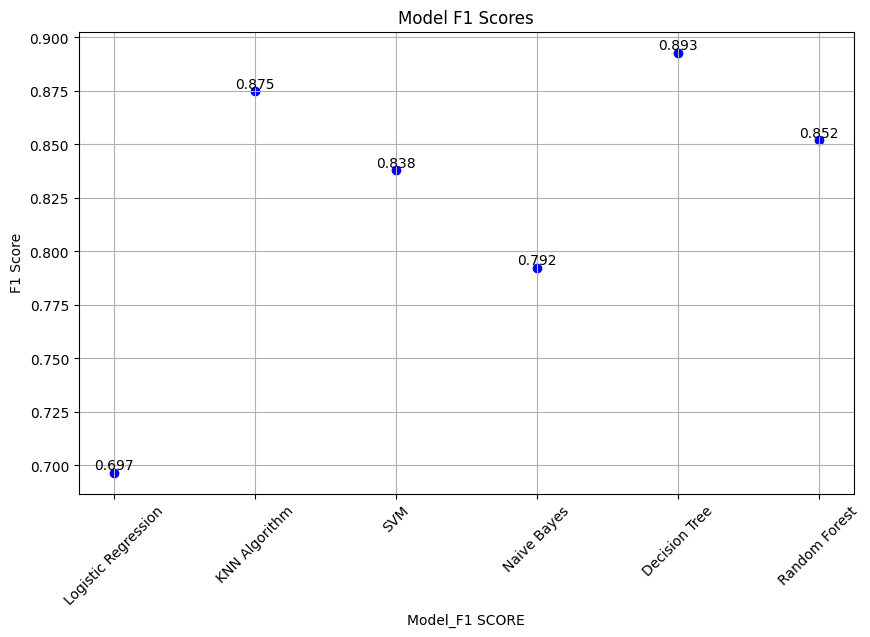

In [ ]:
# F1 SCORE PLOT    F1 Score |   Precision |   Sensitivity (Recall) |   Specificity |   ROC AUC
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'KNN Algorithm', 'SVM', 'Naive Bayes', 'Decision Tree', 'Random Forest']
f1_scores = [logistic_metrics[0], knn_metrics[0], svm_metrics[0], naivebayes_metrics[0], dt_metrics[0], rf_metrics[0]]

plt.figure(figsize=(10, 6))
plt.scatter(models, f1_scores, color='blue', marker='o')

plt.xlabel('Model_F1 SCORE')
plt.ylabel('F1 Score')
plt.title('Model F1 Scores')
plt.xticks(rotation=45)

for i in range(len(models)):
    plt.text(models[i], f1_scores[i], f"{f1_scores[i]:.3f}", ha='center', va='bottom')
plt.grid(True)
plt.show()

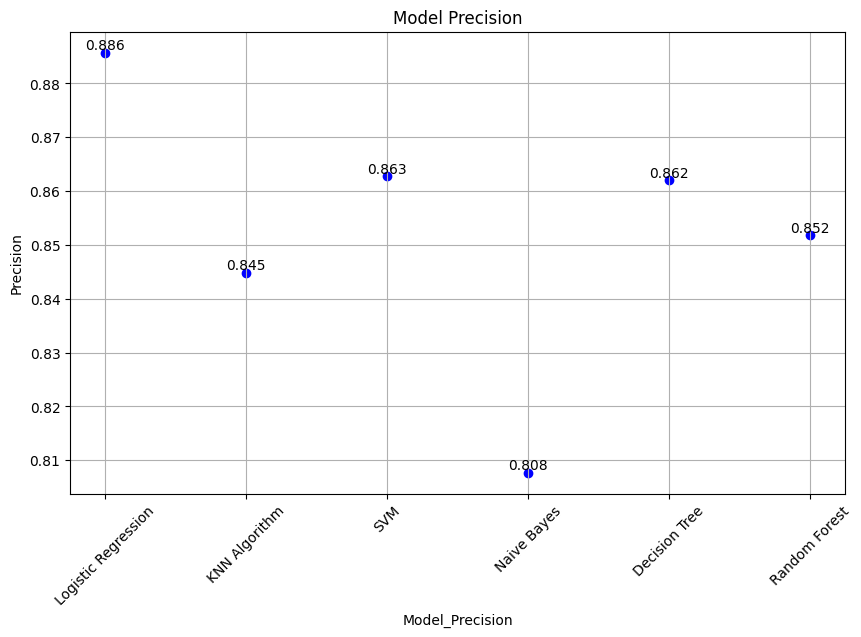

In [ ]:
# Precision PLOT
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'KNN Algorithm', 'SVM', 'Naive Bayes', 'Decision Tree', 'Random Forest']
Precision = [logistic_metrics[1], knn_metrics[1], svm_metrics[1], naivebayes_metrics[1], dt_metrics[1], rf_metrics[1]]

plt.figure(figsize=(10, 6))
plt.scatter(models, Precision, color='blue', marker='o')

plt.xlabel('Model_Precision')
plt.ylabel('Precision')
plt.title('Model Precision')
plt.xticks(rotation=45)

for i in range(len(models)):
    plt.text(models[i], Precision[i], f"{Precision[i]:.3f}", ha='center', va='bottom')
plt.grid(True)
plt.show()

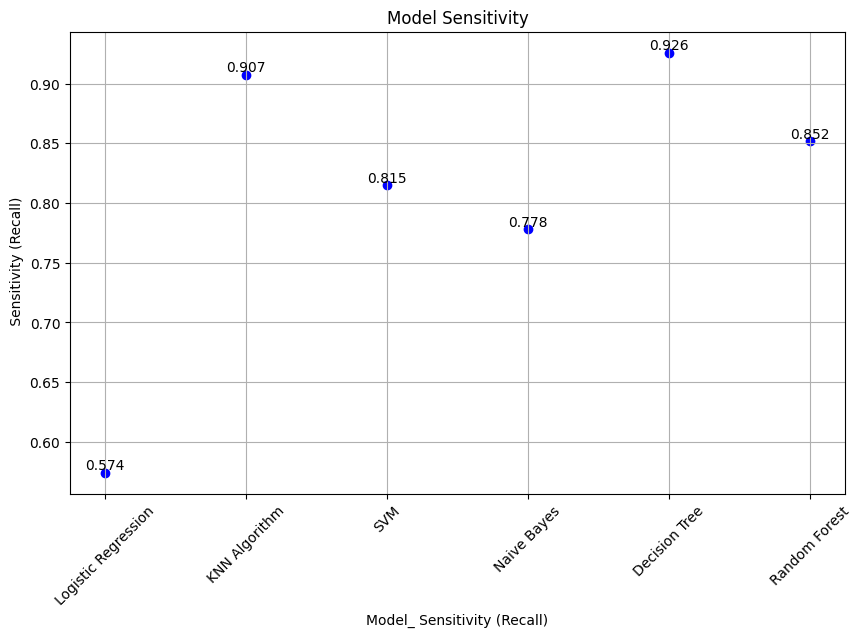

In [ ]:
#  Sensitivity (Recall) PLOT
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'KNN Algorithm', 'SVM', 'Naive Bayes', 'Decision Tree', 'Random Forest']
Sensitivity = [logistic_metrics[2], knn_metrics[2], svm_metrics[2], naivebayes_metrics[2], dt_metrics[2], rf_metrics[2]]

plt.figure(figsize=(10, 6))
plt.scatter(models, Sensitivity, color='blue', marker='o')

plt.xlabel('Model_ Sensitivity (Recall)')
plt.ylabel(' Sensitivity (Recall)')
plt.title('Model Sensitivity')
plt.xticks(rotation=45)

for i in range(len(models)):
    plt.text(models[i], Sensitivity[i], f"{Sensitivity[i]:.3f}", ha='center', va='bottom')
plt.grid(True)
plt.show()

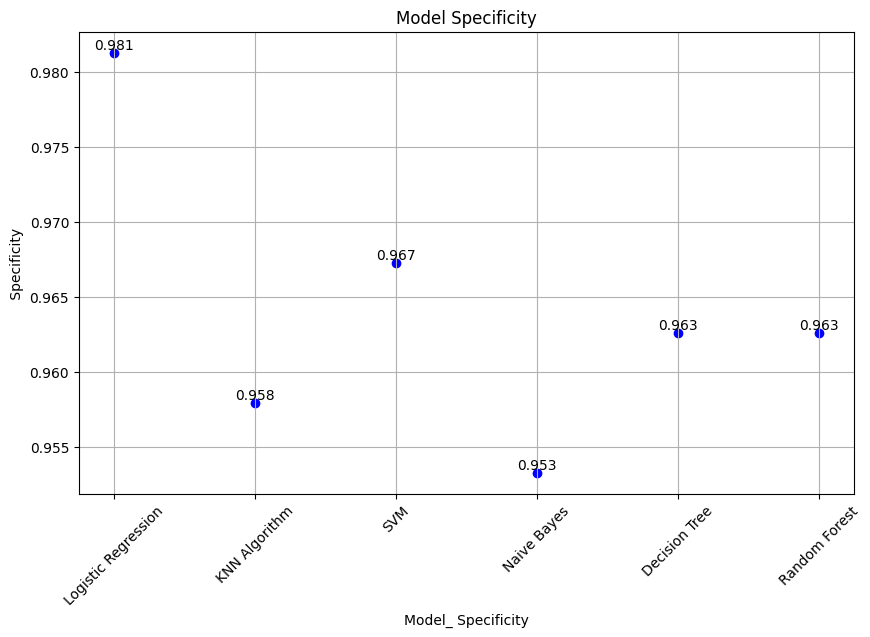

In [ ]:
#  Specificity PLOT
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'KNN Algorithm', 'SVM', 'Naive Bayes', 'Decision Tree', 'Random Forest']
Specificity = [logistic_metrics[3], knn_metrics[3], svm_metrics[3], naivebayes_metrics[3], dt_metrics[3], rf_metrics[3]]

plt.figure(figsize=(10, 6))
plt.scatter(models, Specificity, color='blue', marker='o')

plt.xlabel('Model_ Specificity')
plt.ylabel(' Specificity ')
plt.title('Model Specificity')
plt.xticks(rotation=45)

for i in range(len(models)):
    plt.text(models[i], Specificity[i], f"{Specificity[i]:.3f}", ha='center', va='bottom')
plt.grid(True)
plt.show()

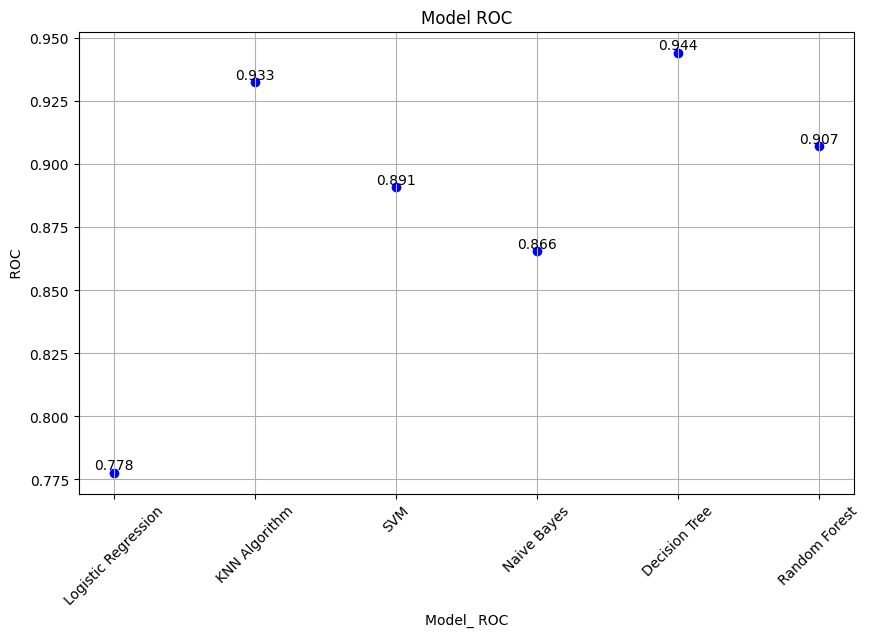

In [ ]:
#  ROC PLOT
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'KNN Algorithm', 'SVM', 'Naive Bayes', 'Decision Tree', 'Random Forest']
ROC = [logistic_metrics[4], knn_metrics[4], svm_metrics[4], naivebayes_metrics[4], dt_metrics[4], rf_metrics[4]]

plt.figure(figsize=(10, 6))
plt.scatter(models, ROC, color='blue', marker='o')

plt.xlabel('Model_ ROC')
plt.ylabel(' ROC ')
plt.title('Model ROC')
plt.xticks(rotation=45)

for i in range(len(models)):
    plt.text(models[i], ROC[i], f"{ROC[i]:.3f}", ha='center', va='bottom')
plt.grid(True)
plt.show()

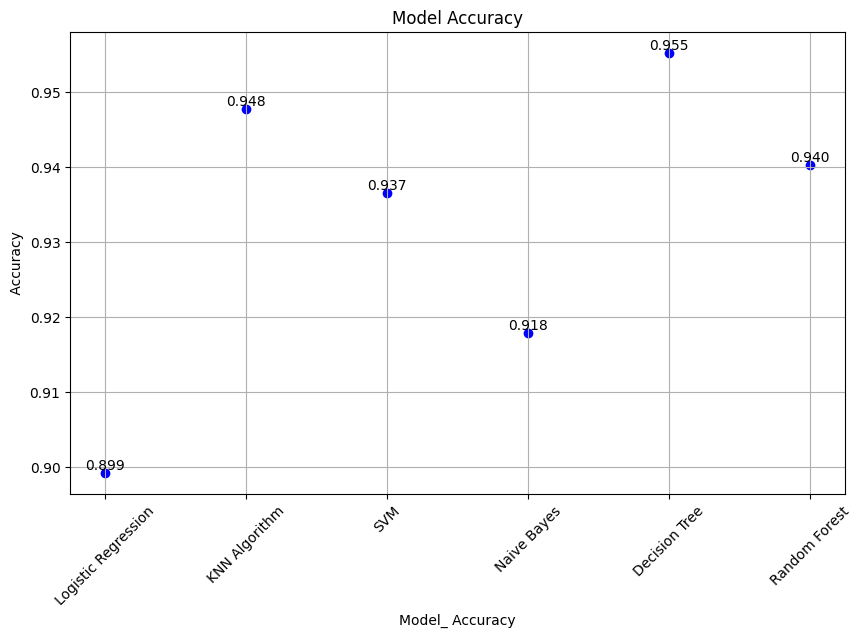

In [ ]:
#  ACCURACY PLOT
import matplotlib.pyplot as plt
#accuracy_variables = [accuracyLG, accuracyKNN, accuracySVM, accuracyNaiveBayes, accuracyDT, accuracyRF]
models = ['Logistic Regression', 'KNN Algorithm', 'SVM', 'Naive Bayes', 'Decision Tree', 'Random Forest']
Accuracy_variable = [accuracyLG, accuracyKNN, accuracySVM, accuracyNaiveBayes, accuracyDT, accuracyRF]

plt.figure(figsize=(10, 6))
plt.scatter(models, Accuracy_variable, color='blue', marker='o')

plt.xlabel('Model_ Accuracy')
plt.ylabel(' Accuracy ')
plt.title('Model Accuracy')
plt.xticks(rotation=45)

for i in range(len(models)):
    plt.text(models[i], Accuracy_variable[i], f"{Accuracy_variable[i]:.3f}", ha='center', va='bottom')
plt.grid(True)
plt.show()